In [171]:
from geopy.distance import distance
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
import requests
from bs4 import BeautifulSoup
import time
import random
from collections import Counter

In [2]:
# Let's see how Lana del Rey's style has progressed over the course of 10 years. We will look at her lyrics across all her albums and extract the most common topics.

In [6]:
main = requests.get('https://www.azlyrics.com/l/lanadelrey.html').text
soup_main = BeautifulSoup(main, "lxml")

In [9]:
albums = soup_main.find_all('div', {'class' : 'album'})

In [14]:
# the markup is flat, meaning every song in every album is a sibiling of every other song.

In [92]:
data = []


In [96]:
for album in albums:
    album_name = album.getText()
    for item in album.find_all_next():
        if item.attrs and item.attrs.get('class', None) == ['listalbum-item']:
            url = item.find_next('a').attrs['href'].replace('..', 'https://www.azlyrics.com')
            title = item.find_next('a').getText()
            data.append( [album_name, title, url])
        elif item.attrs and item.attrs.get('class', None) == ['album']:
            break

In [98]:
df = pd.DataFrame(data, columns=['album', 'song', 'url'])

In [129]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:42.0) Gecko/20100101 Firefox/42.0'}

def get_lyrics(url):
    time.sleep(random.randint(13, 25))
    html = requests.get(url, headers=headers).text
    soup = BeautifulSoup(html, 'lxml')
    try:
        lyrics = soup.find('div', {'id' : 'azmxmbanner'}).find_previous('div').getText()
    except:
        import ipdb
        ipdb.set_trace()
        lyrics = 'failed'
    
    return lyrics
    

df['lyrics'] = df.url.apply(get_lyrics)

In [130]:
df

,album,song,url,lyrics
0,"demo: ""Sirens"" (2005)(as May Jailer)",Drive By (For K),https://www.azlyrics.com/lyrics/lanadelrey/dri...,\n\r\nIt was a drive-by Sunday night\nMost of ...
1,"demo: ""Sirens"" (2005)(as May Jailer)",Next To Me,https://www.azlyrics.com/lyrics/lanadelrey/nex...,\n\r\nAnother day is over\nAnother day is done...
2,"demo: ""Sirens"" (2005)(as May Jailer)",A Star For Nick,https://www.azlyrics.com/lyrics/lanadelrey/ast...,\n\r\nYou know it & I know it\nI'm gonna be a ...
3,"demo: ""Sirens"" (2005)(as May Jailer)",My Momma,https://www.azlyrics.com/lyrics/lanadelrey/mym...,\n\r\nMy momma wouldn't say you were a nice gu...
4,"demo: ""Sirens"" (2005)(as May Jailer)",Bad Disease,https://www.azlyrics.com/lyrics/lanadelrey/bad...,"\n\r\nWell, there is something about watching ..."
5,"demo: ""Sirens"" (2005)(as May Jailer)",Out With A Bang,https://www.azlyrics.com/lyrics/lanadelrey/out...,"\n\r\nLittle bits and pieces, falling to the c..."
6,"demo: ""Sirens"" (2005)(as May Jailer)",Dear Elliot,https://www.azlyrics.com/lyrics/lanadelrey/dea...,\n\r\nYou didn't think about anyone else\nYou ...
7,"demo: ""Sirens"" (2005)(as May Jailer)",Try Tonight,https://www.azlyrics.com/lyrics/lanadelrey/try...,\n\r\nCan't put my finger on it\nBut I know I ...
8,"demo: ""Sirens"" (2005)(as May Jailer)",Peace (All You Need),https://www.azlyrics.com/lyrics/lanadelrey/pea...,\n\r\nYou have a right\nTo live your life\nLik...
9,"demo: ""Sirens"" (2005)(as May Jailer)",I'm Indebited To You (How Do You Know Me So We...,https://www.azlyrics.com/lyrics/lanadelrey/imi...,\n\r\nWhat an unusual name you said\nWhat a sp...


In [131]:
df.to_excel('lana.xlsx')

In [132]:
df.to_pickle('lana.pkl')

In [525]:
df = pd.read_pickle('lana.pkl')

### Data cleaning

In [526]:
df.lyrics = df.lyrics.str.lower()
df.lyrics = df.lyrics.str.replace('\\n|\r', ' ' )
df.lyrics = df.lyrics.str.replace('[^\w\s-]','')
df.lyrics = df.lyrics.str.replace('lana del rey|we\'ll', '')
df.album = df.album.str.findall("\"(.+?)\" \(")
df.album = df.album.str[0]

In [527]:
df.lyrics = df.lyrics.str.replace('dnt', 'dn\'t').str.replace('â', "'").str.replace('2x|4x', '')


In [539]:
stop = stopwords.words('english')
stop.extend(["we'll", "ooh", 'ah-ah-ah', 't-t-t', '-ah', 'ooh-ooh', 'la-da-da-da-da', 'ah-ah-ah-ah', 'la-da-da-da-da'])
df.lyrics = df.lyrics.str.replace("\s|\s".join(stop), " ")

In [540]:
df.head(5)

,album,song,url,lyrics
0,Sirens,Drive By (For K),https://www.azlyrics.com/lyrics/lanadelrey/dri...,drive-by sunday night us bed right turned ...
1,Sirens,Next To Me,https://www.azlyrics.com/lyrics/lanadelrey/nex...,another day another day done im getting clo...
2,Sirens,A Star For Nick,https://www.azlyrics.com/lyrics/lanadelrey/ast...,know know im gonna star wont wont get far...
3,Sirens,My Momma,https://www.azlyrics.com/lyrics/lanadelrey/mym...,momma say nice guy youre forty a job momma ...
4,Sirens,Bad Disease,https://www.azlyrics.com/lyrics/lanadelrey/bad...,well something watching crime makes want go...


# Each album represents one document

In [541]:
agg = df.groupby('album').agg({'lyrics' : list}).reset_index()
agg.lyrics = agg.lyrics.apply(lambda x: " ".join(x))

In [542]:
agg

,album,lyrics
0,A.K.A. Lizzy Grant,bound stairs im shower know going leave kn...
1,Born To Die,why feet dont fail take finish line oh hea...
2,Honeymoon,know fashionable love dont go cause truly t...
3,Lust For Life,look kids vintage music comin satellites cr...
4,Norman Fucking Rockwell!,god damn man-child fucked good almost said...
5,Sirens,drive-by sunday night us bed right turned ...
6,Ultraviolence,share body mind thats did do cause far pas...


In [543]:
from nltk.corpus import stopwords
import math
stop = stopwords.words('english')

agg['words'] = agg.lyrics.str.split()
#agg.words = agg.words.apply(lambda x: [x for x in x if x not in stop])
agg['word_counts'] = agg['words'].apply(Counter).apply(dict)

In [544]:
agg.head(5)

,album,lyrics,words,word_counts
0,A.K.A. Lizzy Grant,bound stairs im shower know going leave kn...,"[bound, stairs, im, shower, know, going, leave...","{'bound': 1, 'stairs': 1, 'im': 34, 'shower': ..."
1,Born To Die,why feet dont fail take finish line oh hea...,"[why, feet, dont, fail, take, finish, line, oh...","{'why': 1, 'feet': 2, 'dont': 68, 'fail': 2, '..."
2,Honeymoon,know fashionable love dont go cause truly t...,"[know, fashionable, love, dont, go, cause, tru...","{'know': 18, 'fashionable': 1, 'love': 33, 'do..."
3,Lust For Life,look kids vintage music comin satellites cr...,"[look, kids, vintage, music, comin, satellites...","{'look': 3, 'kids': 4, 'vintage': 1, 'music': ..."
4,Norman Fucking Rockwell!,god damn man-child fucked good almost said...,"[god, damn, man-child, fucked, good, almost, s...","{'god': 7, 'damn': 2, 'man-child': 2, 'fucked'..."


In [545]:
def get_tf(val):
    tf_dict = {}
    total = sum(val.values())
    for word, count in val.items():
        tf_dict[word] = count / total
    return tf_dict

agg['tf_dict'] = agg.word_counts.apply(get_tf)

In [546]:
n_docs = len(agg)
docs = agg.word_counts.tolist()

def get_idf(val):
    idfs = {}
    for word, count in val.items():
        n_docs_with_word = 0
        for doc in docs:
            if word in doc.keys():
                n_docs_with_word += 1
        idfs[word] = math.log(n_docs / n_docs_with_word)
    return idfs

agg['idfs'] = agg.word_counts.apply(get_idf)

In [547]:
agg.head()

,album,lyrics,words,word_counts,tf_dict,idfs
0,A.K.A. Lizzy Grant,bound stairs im shower know going leave kn...,"[bound, stairs, im, shower, know, going, leave...","{'bound': 1, 'stairs': 1, 'im': 34, 'shower': ...","{'bound': 0.0006464124111182935, 'stairs': 0.0...","{'bound': 1.252762968495368, 'stairs': 1.94591..."
1,Born To Die,why feet dont fail take finish line oh hea...,"[why, feet, dont, fail, take, finish, line, oh...","{'why': 1, 'feet': 2, 'dont': 68, 'fail': 2, '...","{'why': 0.00020777062123415748, 'feet': 0.0004...","{'why': 1.252762968495368, 'feet': 1.252762968..."
2,Honeymoon,know fashionable love dont go cause truly t...,"[know, fashionable, love, dont, go, cause, tru...","{'know': 18, 'fashionable': 1, 'love': 33, 'do...","{'know': 0.009109311740890687, 'fashionable': ...","{'know': 0.0, 'fashionable': 1.945910149055313..."
3,Lust For Life,look kids vintage music comin satellites cr...,"[look, kids, vintage, music, comin, satellites...","{'look': 3, 'kids': 4, 'vintage': 1, 'music': ...","{'look': 0.0010395010395010396, 'kids': 0.0013...","{'look': 0.15415067982725836, 'kids': 0.559615..."
4,Norman Fucking Rockwell!,god damn man-child fucked good almost said...,"[god, damn, man-child, fucked, good, almost, s...","{'god': 7, 'damn': 2, 'man-child': 2, 'fucked'...","{'god': 0.0029057700290577005, 'damn': 0.00083...","{'god': 0.0, 'damn': 1.252762968495368, 'man-c..."


In [548]:
def get_tf_idf(row):
    tf = np.array(list(row.tf_dict.values()))
    idf = np.array(list(row.idfs.values()))
    result = tf * idf
    
    return dict(zip(row.tf_dict.keys(), result))
    

agg['tf_idf'] = agg.apply(get_tf_idf, axis=1)
agg.tf_idf = agg.tf_idf.apply(lambda x: {k : v for k, v in sorted(x.items(), key=lambda x: x[1], reverse=True)})

A.K.A. Lizzy Grant


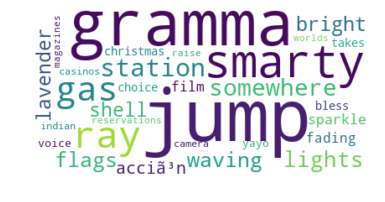

Born To Die


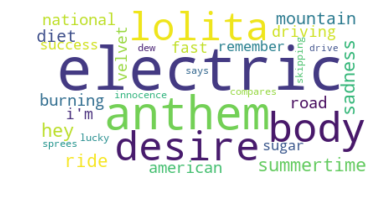

Honeymoon


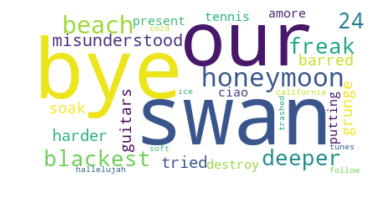

Lust For Life


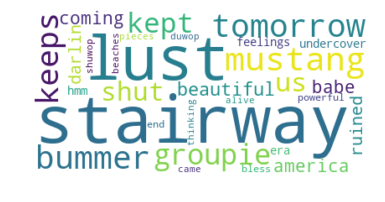

Norman Fucking Rockwell!


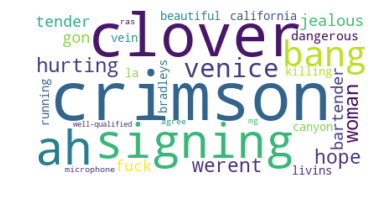

Sirens


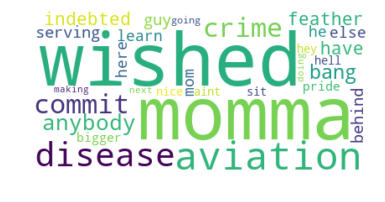

Ultraviolence


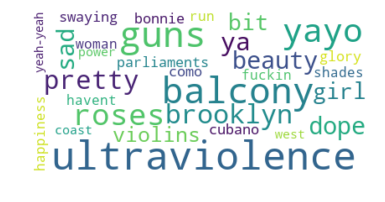

In [552]:
import wordcloud

for album in agg.album.tolist():
    print(album)
    plt.figure()
    cloud = wordcloud.WordCloud( background_color="white", max_words=30)
    cloud.generate_from_frequencies(frequencies=agg.loc[agg.album == album]['tf_idf'].values[0])
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### Each song represents one document

In [351]:
from nltk.corpus import stopwords
import math
stop = stopwords.words('english')

df['words'] = df.lyrics.str.split()
df.words = df.words.apply(lambda x: [x for x in x if x not in stop])
df['word_counts'] = df['words'].apply(Counter).apply(dict)

In [352]:
df.head()

,album,song,url,lyrics,words,word_counts
0,Sirens,Drive By (For K),https://www.azlyrics.com/lyrics/lanadelrey/dri...,it was a drive-by sunday night most of us w...,"[drive-by, sunday, night, us, bed, right, turn...","{'drive-by': 1, 'sunday': 1, 'night': 1, 'us':..."
1,Sirens,Next To Me,https://www.azlyrics.com/lyrics/lanadelrey/nex...,another day is over another day is done now...,"[another, day, another, day, done, im, getting...","{'another': 8, 'day': 4, 'done': 3, 'im': 4, '..."
2,Sirens,A Star For Nick,https://www.azlyrics.com/lyrics/lanadelrey/ast...,you know it i know it im gonna be a star y...,"[know, know, im, gonna, star, wont, wont, get,...","{'know': 5, 'im': 2, 'gonna': 2, 'star': 2, 'w..."
3,Sirens,My Momma,https://www.azlyrics.com/lyrics/lanadelrey/mym...,my momma wouldn't say you were a nice guy b...,"[momma, say, nice, guy, youre, forty, job, mom...","{'momma': 12, 'say': 6, 'nice': 1, 'guy': 1, '..."
4,Sirens,Bad Disease,https://www.azlyrics.com/lyrics/lanadelrey/bad...,well there is something about watching a cr...,"[well, something, watching, crime, makes, want...","{'well': 1, 'something': 3, 'watching': 1, 'cr..."


In [353]:
def get_tf(val):
    tf_dict = {}
    total = sum(val.values())
    for word, count in val.items():
        tf_dict[word] = count / total
    return tf_dict

df['tf_dict'] = df.word_counts.apply(get_tf)

In [354]:
df.head(1)

,album,song,url,lyrics,words,word_counts,tf_dict
0,Sirens,Drive By (For K),https://www.azlyrics.com/lyrics/lanadelrey/dri...,it was a drive-by sunday night most of us w...,"[drive-by, sunday, night, us, bed, right, turn...","{'drive-by': 1, 'sunday': 1, 'night': 1, 'us':...","{'drive-by': 0.008695652173913044, 'sunday': 0..."


In [355]:
n_docs = len(df)
docs = df.word_counts.tolist()

def get_idf(val):
    idfs = {}
    for word, count in val.items():
        n_docs_with_word = 0
        for doc in docs:
            if word in doc.keys():
                n_docs_with_word += 1
        idfs[word] = math.log(n_docs / n_docs_with_word)
    return idfs

df['idfs'] = df.word_counts.apply(get_idf)

In [357]:
df.head(1)

,album,song,url,lyrics,words,word_counts,tf_dict,idfs
0,Sirens,Drive By (For K),https://www.azlyrics.com/lyrics/lanadelrey/dri...,it was a drive-by sunday night most of us w...,"[drive-by, sunday, night, us, bed, right, turn...","{'drive-by': 1, 'sunday': 1, 'night': 1, 'us':...","{'drive-by': 0.008695652173913044, 'sunday': 0...","{'drive-by': 4.727387818712341, 'sunday': 4.03..."


In [368]:
def get_tf_idf(row):
    tf = np.array(list(row.tf_dict.values()))
    idf = np.array(list(row.idfs.values()))
    result = tf * idf
    
    return dict(zip(row.tf_dict.keys(), result))
    

df['tf_idf'] = df.apply(get_tf_idf, axis=1)

In [370]:
df.head(1)

,album,song,url,lyrics,words,word_counts,tf_dict,idfs,tf_idf
0,Sirens,Drive By (For K),https://www.azlyrics.com/lyrics/lanadelrey/dri...,it was a drive-by sunday night most of us w...,"[drive-by, sunday, night, us, bed, right, turn...","{'drive-by': 1, 'sunday': 1, 'night': 1, 'us':...","{'drive-by': 0.008695652173913044, 'sunday': 0...","{'drive-by': 4.727387818712341, 'interrupt': 4...","{'drive-by': 0.04110772016271601, 'sunday': 0...."


In [371]:
df.tf_idf = df.tf_idf.apply(lambda x: {k : v for k, v in sorted(x.items(), key=lambda x: x[1], reverse=True)})

In [373]:
df.head(5)

,album,song,url,lyrics,words,word_counts,tf_dict,idfs,tf_idf
0,Sirens,Drive By (For K),https://www.azlyrics.com/lyrics/lanadelrey/dri...,it was a drive-by sunday night most of us w...,"[drive-by, sunday, night, us, bed, right, turn...","{'drive-by': 1, 'sunday': 1, 'night': 1, 'us':...","{'drive-by': 0.008695652173913044, 'sunday': 0...","{'drive-by': 4.727387818712341, 'interrupt': 4...","{'wished': 0.49329264195259204, 'commit': 0.20..."
1,Sirens,Next To Me,https://www.azlyrics.com/lyrics/lanadelrey/nex...,another day is over another day is done now...,"[another, day, another, day, done, im, getting...","{'another': 8, 'day': 4, 'done': 3, 'im': 4, '...","{'another': 0.08695652173913043, 'day': 0.0434...","{'awfully': 4.727387818712341, 'decisions': 4....","{'another': 0.41107720162716005, 'hey': 0.2366..."
2,Sirens,A Star For Nick,https://www.azlyrics.com/lyrics/lanadelrey/ast...,you know it i know it im gonna be a star y...,"[know, know, im, gonna, star, wont, wont, get,...","{'know': 5, 'im': 2, 'gonna': 2, 'star': 2, 'w...","{'know': 0.1111111111111111, 'im': 0.044444444...","{'carrying': 4.727387818712341, 'countryside':...","{'know': 0.52526531319026, 'wont': 0.358599167..."
3,Sirens,My Momma,https://www.azlyrics.com/lyrics/lanadelrey/mym...,my momma wouldn't say you were a nice guy b...,"[momma, say, nice, guy, youre, forty, job, mom...","{'momma': 12, 'say': 6, 'nice': 1, 'guy': 1, '...","{'momma': 0.08759124087591241, 'say': 0.043795...","{'momma': 4.727387818712341, 'exactly': 4.7273...","{'momma': 0.4140777651426868, 'say': 0.2070388..."
4,Sirens,Bad Disease,https://www.azlyrics.com/lyrics/lanadelrey/bad...,well there is something about watching a cr...,"[well, something, watching, crime, makes, want...","{'well': 1, 'something': 3, 'watching': 1, 'cr...","{'well': 0.008547008547008548, 'something': 0....","{'disease': 4.727387818712341, 'puts': 4.72738...","{'got': 0.37218210564556214, 'bad': 0.31015175..."


# Visualize

In [393]:
import wordcloud

for song in df.song:
    print(song)
    plt.figure()
    cloud = wordcloud.WordCloud().generate_from_frequencies(frequencies=df.loc[df.song == song]['tf_idf'].values[0])
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [381]:
wordcloud = wordcloud.WordCloud().generate_from_frequencies(frequencies=df.loc[1]['tf_idf'])

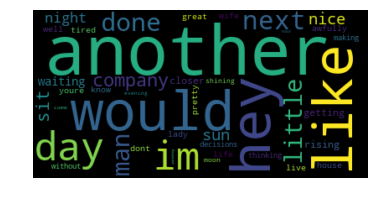

In [382]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [293]:
agg.to_excel('lana_agg.xlsx')